In [286]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import copy
import time
import random

In [287]:
np.set_printoptions(threshold=sys.maxsize)

In [288]:
u = [0.1, 0.2]
split = int(1000.0)
star = np.zeros((2*split+1, 2*split+1))
total = 0
for i in range(-split, split+1):
    rg_j = abs(int((split**2 - i**2)**0.5))
    for j in range(-rg_j, rg_j+1):
        x = (i)/split
        y = (j)/split
        cosine = abs((1 - x**2 - y**2)**0.5)
        lum = 1 - u[0]*(1 - cosine) - u[1]*((1 - cosine)**2)
        total += lum
        star[split+i][split+j] = lum

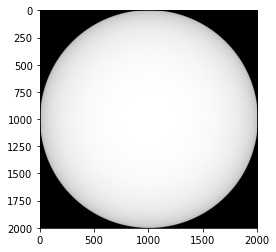

In [289]:
plt.imshow(star, 'gray')

In [290]:
total

2932121.8573496635

In [291]:
def shadow(Rp, orig_x, orig_y, img, total):
    cur_star = copy.deepcopy(img)
    cur_total = copy.deepcopy(total)
    split = int((len(img) - 1)/2)
    orig_x, orig_y, Rp = int(orig_x*split), int(orig_y*split), int(Rp*split)
    for i in range(-Rp, Rp+1):
        rg_j = abs(int((Rp**2 - i**2)**0.5))
        for j in range(-rg_j, rg_j+1):
            m = split - orig_y + i
            n = split + orig_x + j
            lum = cur_star[m][n]
            cur_total -= lum
            cur_star[m][n] = 0
    return cur_star, cur_total

In [292]:
(len(img) - 1)/2

10000.0

In [293]:
new_star, new_total = shadow(0.1, 0.0, 0.0, star, total)
total, new_total

(2932121.8573496635, 2900712.7775872923)

In [294]:
new_star, new_total = shadow(0.1, 0.1, 0.0, star, total)
total, new_total

(2932121.8573496635, 2900729.0836725333)

In [295]:
new_star, new_total = shadow(0.1, 0.2, 0.0, star, total)
total, new_total

(2932121.8573496635, 2900780.475797923)

In [296]:
new_star, new_total = shadow(0.1, 0.3, 0.0, star, total)
total, new_total

(2932121.8573496635, 2900874.783786009)

-0.6 -0.1 2932121.8573496635 2901653.3094824157 30468.547867247835


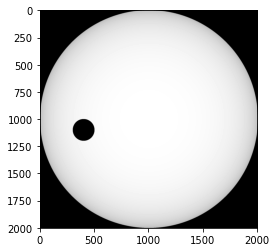

0.2 0.4 2932121.8573496635 2901124.718848389 30997.1385012744


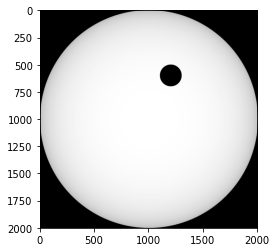

-0.2 0.1 2932121.8573496635 2900798.453189664 31323.404159999453


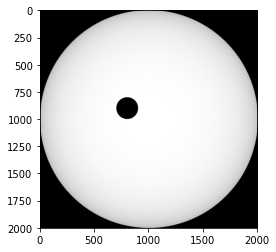

-0.4 -0.4 2932121.8573496635 2901476.856675174 30645.00067448942


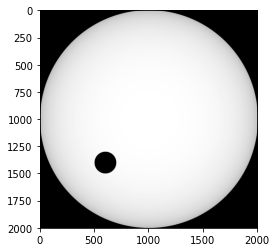

-0.8 0.6 2932121.8573496635 2919550.699133875 12571.158215788659


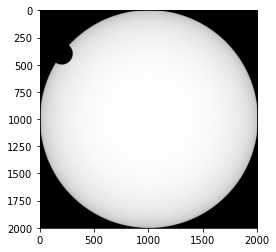

-0.9 0.9 2932121.8573496635 2932121.8573496635 0.0


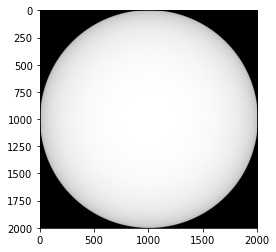

-0.4 -0.3 2932121.8573496635 2901260.2605912806 30861.59675838286


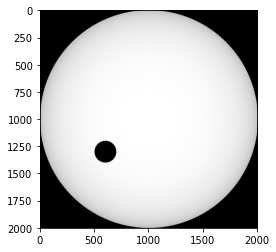

0.4 0.2 2932121.8573496635 2901124.718848389 30997.1385012744


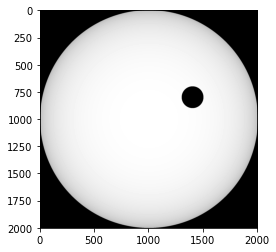

0.7 0.5 2932121.8573496635 2903923.8930747784 28197.964274885133


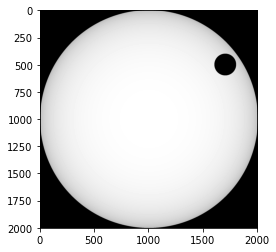

-0.1 0.9 2932121.8573496635 2905137.567657572 26984.28969209129


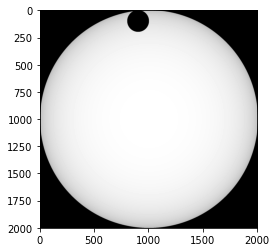

In [299]:
for i in range(10): # 4 sec
    x = random.randint(-9,9)
    y = random.randint(-9,9)
    new_star, new_total = shadow(0.1, x/10, y/10, star, total)
    print(x/10, y/10, total, new_total, total - new_total)
    plt.imshow(new_star, 'gray')
    plt.show()